In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
# Correct file path handling
file_path = r'C:\Users\Lakshman kumar sah\Desktop\HEALTH\notebook\data\GroundTruth.csv'

# Load the dataset
df = pd.read_csv(file_path)

In [3]:
# Feature selection
X = df.iloc[:, 1:]  # All columns except 'image' (features)
y = X.idxmax(axis=1)  # The target variable is the column with the highest value per row

Target variable distribution:
NV       6705
MEL      1113
BKL      1099
BCC       514
AKIEC     327
VASC      142
DF        115
Name: count, dtype: int64


C:\Users\Lakshman kumar sah\AppData\Local\Temp\ipykernel_21824\51000127.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, order=y.value_counts().index, palette="Set2")


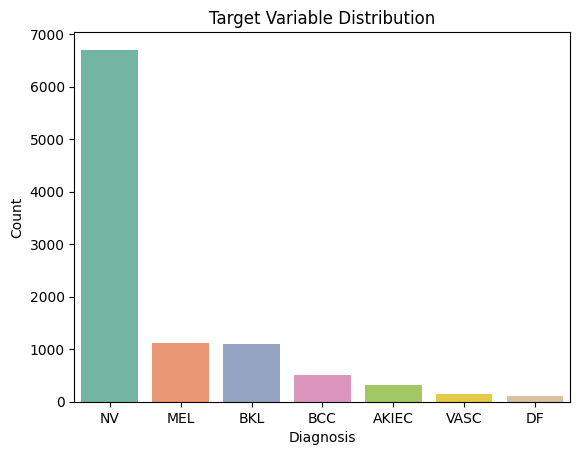

In [4]:
# Display target class distribution
print("Target variable distribution:")
print(y.value_counts())
sns.countplot(x=y, order=y.value_counts().index, palette="Set2")
plt.title("Target Variable Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Model training using Random Forest Classifier
print("\nTraining the model...")
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)


Training the model...


RandomForestClassifier(random_state=42)

In [7]:
# Predictions
print("\nMaking predictions...")
y_pred = model.predict(X_test)


Making predictions...


In [8]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       AKIEC       1.00      1.00      1.00        65
         BCC       1.00      1.00      1.00       103
         BKL       1.00      1.00      1.00       220
          DF       1.00      1.00      1.00        23
         MEL       1.00      1.00      1.00       223
          NV       1.00      1.00      1.00      1341
        VASC       1.00      1.00      1.00        28

    accuracy                           1.00      2003
   macro avg       1.00      1.00      1.00      2003
weighted avg       1.00      1.00      1.00      2003




Confusion Matrix:


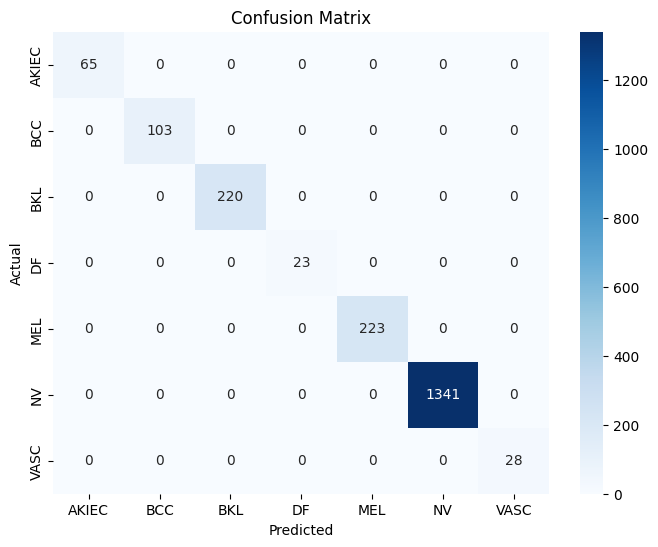

In [9]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
print("\nAccuracy Score:")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy Score:
Accuracy: 100.00%



Feature Importance:


C:\Users\Lakshman kumar sah\AppData\Local\Temp\ipykernel_21824\3479246963.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


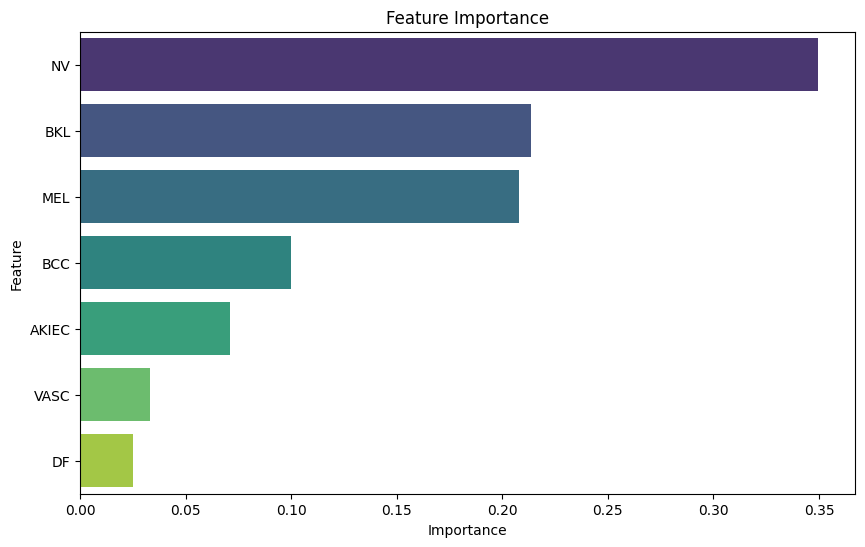

In [11]:
# Feature importance
print("\nFeature Importance:")
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()